In [9]:
import numpy as np
from numpy.linalg.linalg import eigvals
import matplotlib.pyplot as plt
from scipy.linalg import block_diag

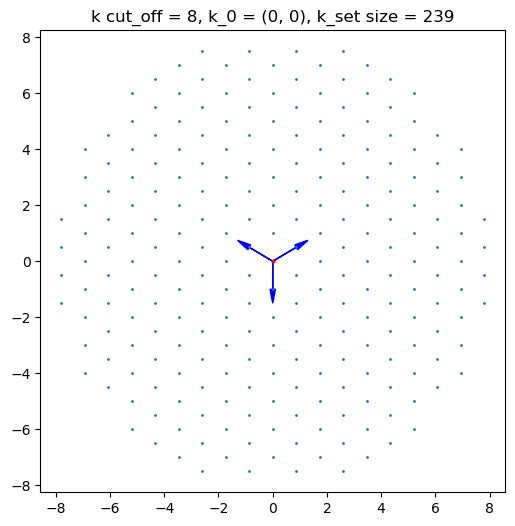

In [18]:
# Generate K set
b_1 = np.array([0, -1])
b_2 = np.array([np.sqrt(3)/2, 1/2])

# b_1 = np.array([1,0])
# b_2 = np.array([0,1])

# Compute the distance from origin in k space with b as PLV
def k_distance(x, y):
    return np.linalg.norm((float(x)*b_1) + (float(y)*b_2))
k_distance = np.vectorize(k_distance)

def generate_pairs_numpy(a_range, b_range):
    a = np.arange(a_range[0], a_range[1] + 1)
    b = np.arange(b_range[0], b_range[1] + 1)
    A, B = np.meshgrid(a, b)
    return np.column_stack((A.ravel(), B.ravel()))

# Return the (kx, ky) vector from coord including offset
def coord_to_vec(k_coord, coord_arr):
    # k_vecx = (k_coord[0]+coord_arr[:,0])*b_1[0]+(k_coord[1] + coord_arr[:,1])*b_2[0]
    # k_vecy = (k_coord[0]+coord_arr[:,0])*b_1[1]+(k_coord[1] + coord_arr[:,1])*b_2[1]
    k_vecx = (coord_arr[:,0])*b_1[0]+(coord_arr[:,1])*b_2[0] + k_coord[0]
    k_vecy = (coord_arr[:,0])*b_1[1]+(coord_arr[:,1])*b_2[1] + k_coord[1]
    return k_vecx, k_vecy 


k_coord = (0,0)
k_cutoff = 8
coord_list = generate_pairs_numpy((-2*int(k_cutoff), 2*int(k_cutoff)), (-2*int(k_cutoff), 2*int(k_cutoff)))
k_set = coord_list[k_distance(coord_list[:,0], coord_list[:,1])<k_cutoff]

# Further filter k_set to remove unwanted points

k_vecx, k_vecy = coord_to_vec(k_coord, k_set)
plt.figure(figsize=(6,6))
# plt.plot(k_set[:,0]*b_1[0]+k_set[:,1]*b_2[0], k_set[:,0]*b_1[1]+k_set[:,1]*b_2[1], 'o', ms=1)
plt.plot(k_vecx, k_vecy, 'o', ms=1)
plt.arrow(0, 0, b_1[0], b_1[1], head_width=0.2, head_length=0.5, fc='blue', ec='blue')
plt.arrow(0, 0, b_2[0], b_2[1], head_width=0.2, head_length=0.5, fc='blue', ec='blue')
plt.arrow(0, 0, -b_1[0]-b_2[0], -b_1[1]-b_2[1], head_width=0.2, head_length=0.5, fc='blue', ec='blue')

test_index = 239//2
# plt.plot(k_set[0,0]*b_1[0]+k_set[0,1]*b_2[0], k_set[0,0]*b_1[1]+k_set[0,1]*b_2[1], 'o', ms=2, color='red')
test_vecx, test_vecy = coord_to_vec(k_coord, k_set[test_index].reshape(1,2))
plt.plot(test_vecx, test_vecy, 'o', ms=2, color='red')
plt.title(f"k cut_off = {k_cutoff}, k_0 = {k_coord}, k_set size = {len(k_set)}")
plt.show()

In [14]:
def label_layer(coord_arr):
    nn_vec_top = [np.array([1,0]), np.array([0,1]), np.array([-1,-1])]
    nn_vec_bottom = [np.array([-1,0]), np.array([0,-1]), np.array([1,1])]
    nn_vec = [nn_vec_top, nn_vec_bottom]
    coord_list = coord_arr.tolist()
    # print(coord_list)
    layer_label = np.full(coord_arr.shape[0], -1)
    # print(coord_list)
    i = coord_list.index([0,0])
    layer_label[i] = 0 # 0 for Top layer
    # locate unvisited neighbors of (0,0)
    N_0 = []
    for vec in nn_vec[layer_label[i]]:
        if (coord_arr[i] + vec).tolist() in coord_list:
            N_0.append((coord_arr[i] + vec).tolist())
    flag = 0
    while N_0 != []:
        print(N_0)
        N_0_new = []
        for n in N_0:
            i = coord_list.index(n)
            print(n, layer_label[i])   
            if layer_label[i] != -1:
                # n has been visited
                continue
            layer_label[i] = 1-flag
            print(n, layer_label[i])
            # locate unvisited neighbors of n
            for vec in nn_vec[layer_label[i]]:
                if (coord_arr[i] + vec).tolist() in coord_list:
                    N_0_new.append((coord_arr[i] + vec).tolist())
        flag = 1-flag
        N_0 = N_0_new
    return layer_label
layer_label = label_layer(k_set)
print(np.column_stack((k_set,layer_label)))

[[1, 0], [0, 1], [-1, -1]]
[1, 0] -1
[1, 0] 1
[0, 1] -1
[0, 1] 1
[-1, -1] -1
[-1, -1] 1
[[0, 0], [1, -1], [2, 1], [-1, 1], [0, 0], [1, 2], [-2, -1], [-1, -2], [0, 0]]
[0, 0] 0
[1, -1] -1
[1, -1] 0
[2, 1] -1
[2, 1] 0
[-1, 1] -1
[-1, 1] 0
[0, 0] 0
[1, 2] -1
[1, 2] 0
[-2, -1] -1
[-2, -1] 0
[-1, -2] -1
[-1, -2] 0
[0, 0] 0
[[2, -1], [1, 0], [0, -2], [3, 1], [2, 2], [1, 0], [0, 1], [-1, 2], [-2, 0], [2, 2], [1, 3], [0, 1], [-1, -1], [-2, 0], [-3, -2], [0, -2], [-1, -1], [-2, -3]]
[2, -1] -1
[2, -1] 1
[1, 0] 1
[0, -2] -1
[0, -2] 1
[3, 1] -1
[3, 1] 1
[2, 2] -1
[2, 2] 1
[1, 0] 1
[0, 1] 1
[-1, 2] -1
[-1, 2] 1
[-2, 0] -1
[-2, 0] 1
[2, 2] 1
[1, 3] -1
[1, 3] 1
[0, 1] 1
[-1, -1] 1
[-2, 0] 1
[-3, -2] -1
[-3, -2] 1
[0, -2] 1
[-1, -1] 1
[-2, -3] -1
[-2, -3] 1
[[1, -1], [2, -2], [3, 0], [-1, -2], [0, -3], [1, -1], [2, 1], [3, 0], [4, 2], [1, 2], [2, 1], [3, 3], [-2, 2], [-1, 1], [0, 3], [-3, 0], [-2, -1], [-1, 1], [0, 3], [1, 2], [2, 4], [-4, -2], [-3, -3], [-2, -1], [-3, -3], [-2, -4], [-1, -2]]
[1, -1

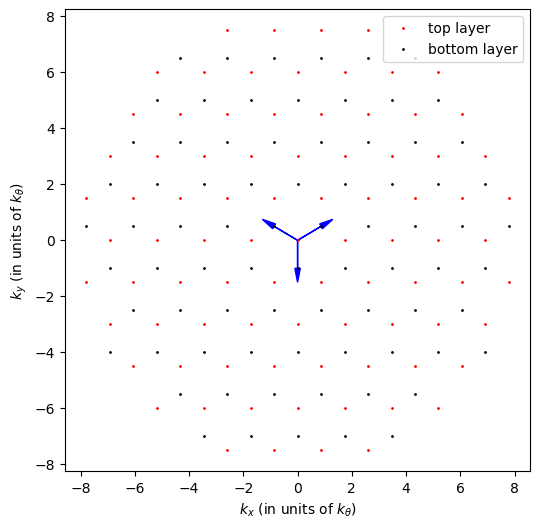

In [22]:
k_vecx, k_vecy = coord_to_vec(k_coord, k_set)
plt.figure(figsize=(6,6))
# plt.plot(k_set[:,0]*b_1[0]+k_set[:,1]*b_2[0], k_set[:,0]*b_1[1]+k_set[:,1]*b_2[1], 'o', ms=1)

plt.arrow(0, 0, b_1[0], b_1[1], head_width=0.2, head_length=0.5, fc='blue', ec='blue')
plt.arrow(0, 0, b_2[0], b_2[1], head_width=0.2, head_length=0.5, fc='blue', ec='blue')
plt.arrow(0, 0, -b_1[0]-b_2[0], -b_1[1]-b_2[1], head_width=0.2, head_length=0.5, fc='blue', ec='blue')

plt.plot(k_vecx[np.where(layer_label==0)], k_vecy[np.where(layer_label==0)], 'o', ms=1, color='red', label='top layer')
plt.plot(k_vecx[np.where(layer_label==1)], k_vecy[np.where(layer_label==1)], 'o', ms=1, color='black', label='bottom layer')
plt.xlabel('$k_x$ (in units of $k_\\theta$)' )
plt.ylabel('$k_y$ (in units of $k_\\theta$)')
plt.legend()
plt.show()

In [25]:
# Filter k_set to remove unwanted points
k_set = k_set[np.where(layer_label != -1)]
k_vecx, k_vecy = coord_to_vec(k_coord, k_set)
layer_label = layer_label[np.where(layer_label != -1)]

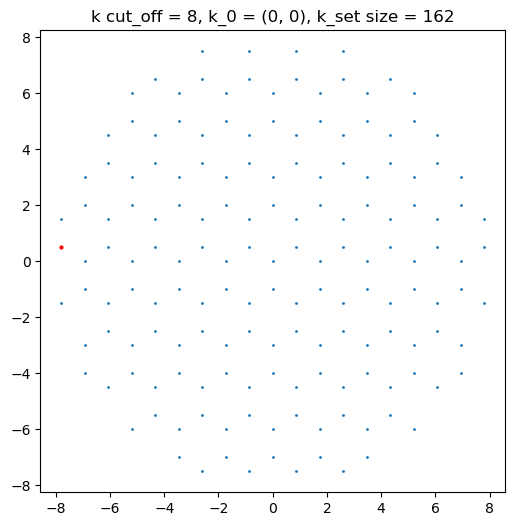

In [26]:
plt.figure(figsize=(6,6))
plt.plot(k_vecx, k_vecy, 'o', ms=1)
test_index = 1
# plt.plot(k_set[0,0]*b_1[0]+k_set[0,1]*b_2[0], k_set[0,0]*b_1[1]+k_set[0,1]*b_2[1], 'o', ms=2, color='red')
test_vecx, test_vecy = coord_to_vec(k_coord, k_set[test_index].reshape(1,2))
plt.plot(test_vecx, test_vecy, 'o', ms=2, color='red')
plt.title(f"k cut_off = {k_cutoff}, k_0 = {k_coord}, k_set size = {len(k_set)}")
plt.show()

In [27]:
# Find indices for k' \pm q_i
# Suppose I have state k' = (a,b) with index i, then the index for k' \pm q_i must be around it as well
# Array to [i, i for q_i, ] , np.nan if outside 
k_set_list = k_set.tolist()
lookup_arr = np.full((len(k_set), 7), -1, dtype=int)
for i in range(lookup_arr.shape[0]):

    if layer_label[i] == 0:
        i_1 = i + 1 if k_distance(k_set[i,0]+1, k_set[i,1]) < k_cutoff else -1
        i_2 = k_set_list.index(list(k_set[i,:] + np.array([0,1]))) if k_distance(k_set[i,0], k_set[i,1]+1) < k_cutoff else -1
        i_3 = k_set_list.index(list(k_set[i,:] + np.array([-1,-1]))) if k_distance(k_set[i,0]-1, k_set[i,1]-1) < k_cutoff else -1
        i_4, i_5, i_6 = -1, -1, -1
    else:
        i_4 = i - 1 if k_distance(k_set[i,0]-1, k_set[i,1]) < k_cutoff else -1
        i_5 = k_set_list.index(list(k_set[i,:]- np.array([0,1]))) if k_distance(k_set[i,0], k_set[i,1]-1) < k_cutoff else -1
        i_6 = k_set_list.index(list(k_set[i,:] - np.array([-1,-1]))) if k_distance(k_set[i,0]+1, k_set[i,1]+1) < k_cutoff else -1
        i_1, i_2, i_3 = -1, -1, -1
    lookup_arr[i,:] = np.array([i, i_1, i_2, i_3, i_4, i_5, i_6])


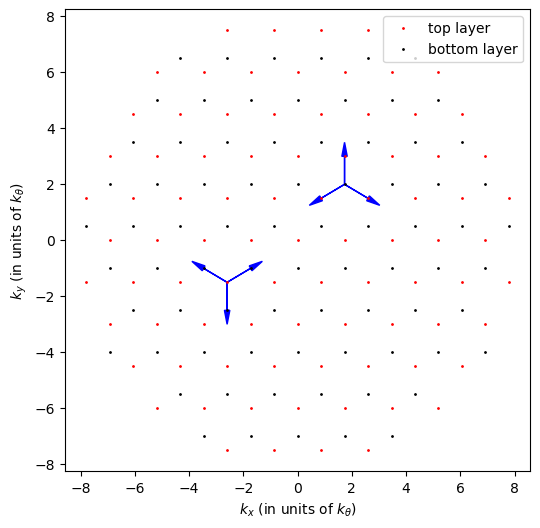

In [48]:
test_index_list = [50,100]
plt.figure(figsize=(6,6))
plt.plot(k_vecx[np.where(layer_label==0)], k_vecy[np.where(layer_label==0)], 'o', ms=1, color='red', label='top layer')
plt.plot(k_vecx[np.where(layer_label==1)], k_vecy[np.where(layer_label==1)], 'o', ms=1, color='black', label='bottom layer')

for test_index in test_index_list:
    for j in range(1,7,1):
        if lookup_arr[test_index,j] == -1: continue 
        test_vecx, test_vecy = coord_to_vec(k_coord, k_set[test_index].reshape(1,2))
        final = [k_set[lookup_arr[test_index,j],0]*b_1[0]+k_set[lookup_arr[test_index,j],1]*b_2[0], 
                k_set[lookup_arr[test_index,j],0]*b_1[1]+k_set[lookup_arr[test_index,j],1]*b_2[1]]
        # print(start, final)
        plt.arrow(test_vecx[0], test_vecy[0], final[0]-test_vecx[0], final[1]-test_vecy[0], 
                head_width=0.2, head_length=0.5, fc='blue', ec='blue')
        # plt.plot(test_vecx, test_vecy, 'o', ms=2, color='red')
        # plt.plot(k_set[lookup_arr[test_index,j],0]*b_1[0]+k_set[lookup_arr[test_index,j],1]*b_2[0], 
        #          k_set[lookup_arr[test_index,j],0]*b_1[1]+k_set[lookup_arr[test_index,j],1]*b_2[1], 'o', ms=2, label=j)
# plt.title(f"k cut_off = {k_cutoff}, k_0 = {k_coord}, k_set size = {len(k_set)}")
plt.xlabel('$k_x$ (in units of $k_\\theta$)' )
plt.ylabel('$k_y$ (in units of $k_\\theta$)')
plt.legend()
plt.show()

In [11]:
# Write down the Hamiltonain
omega_1 = 110 # 110meV 
a = 0.142 #0.142nm 
a_0 = np.sqrt(3)*a
k_D = 4*np.pi/3/a_0 # [1/nm]
phi = 2*np.pi/3
hbar = 6.582e-13 # [meV s]
t =  2.7e3 # 2.7 eV -> meV 
v_F_hbar = 3/2 * a * t # hbar * v_F [meV nm] 
v_F = v_F_hbar/hbar # [nm/s]

sig_0 = np.array([[1,0],
                  [0,1]])
sig_x = np.array([[0,1],
                  [1,0]])
sig_y = np.array([[0, -1j], 
                  [1j, 0]], dtype=complex)
omega_0 = omega_1
zero2 = np.zeros((2,2))

T = [np.nan] + [omega_0*sig_0 + omega_1*(np.cos(phi*j)*sig_x+np.sin(phi*j)*sig_y) for j in range(3)] # Tunneling amplitudes
H = np.zeros((2*len(k_set), 2*len(k_set)), dtype=complex)
# Loop over 4x4 block entries
for i in range(len(k_set)):
    for j in range(1,4):
        l = lookup_arr[i,j]
        if l == -1: continue
        H[2*i:2*(i+1), 2*l:2*(l+1)] = T[j]
    for j in range(4,7):
        l = lookup_arr[i,j]
        if l == -1: continue
        H[2*i:2*(i+1), 2*l:2*(l+1)] = T[j-3].conj().T


In [12]:
# Diagonal Strip
k_coord = (0,0)
theta = 1
# return 4x4 dirac hamiltonian 
def h_k(k_vecx, k_vecy, i, theta):
    k_theta = 2*k_D*np.sin(theta)
    theta_k = np.arctan2(k_vecy,k_vecx)
    e1 = np.exp(1j*(theta_k-theta))
    h1 = np.array([[0, e1], [np.conj(e1), 0]])
    e2 = np.exp(1j*(theta_k+theta))
    h2 = np.array([[0, e2], [np.conj(e2), 0]])
    h = h1 if i == 0 else h2
    # print(k_vecx, k_vecy, theta_k, theta, np.linalg.norm([k_vecx, k_vecy]))
    # print(e1, e2)
    return v_F_hbar*k_theta*np.linalg.norm([k_vecx, k_vecy])*h
diagonal_list = [h_k(kx, ky, i, theta/2) for kx,ky,i in zip(k_vecx, k_vecy, layer_label)]
H_diag = block_diag(*diagonal_list) 
H = H + H_diag

In [14]:
print(np.column_stack((k_vecx, k_vecy)))
# print(np.linalg.norm([k_vecx, k_vecy]))
print(k_set)

[[-0.8660254  0.5      ]
 [ 0.         0.       ]
 [ 0.        -1.       ]
 [ 0.8660254  0.5      ]]
[[-1 -1]
 [ 0  0]
 [ 1  0]
 [ 0  1]]


In [15]:
from sympy import Matrix
i,j= 0,1
Matrix(H[2*i:2*i+2,2*j:2*j+2])

Matrix([
[                     110.0, -55.0 + 95.2627944162882*I],
[-55.0 - 95.2627944162882*I,                      110.0]])

In [16]:
Matrix(H)

Matrix([
[                                     0, -9388.86781348195 + 221.606923975066*I,                      110.0, -55.0 + 95.2627944162882*I,                                     0,                                     0,                                     0,                                     0],
[-9388.86781348195 - 221.606923975066*I,                                      0, -55.0 - 95.2627944162882*I,                      110.0,                                     0,                                     0,                                     0,                                     0],
[                                 110.0,             -55.0 + 95.2627944162882*I,                          0,                          0,                                 110.0,                                 110.0,                                 110.0,            -55.0 - 95.2627944162883*I],
[            -55.0 - 95.2627944162882*I,                                  110.0,                          0, 

In [36]:
from importlib import reload
import TwistedBilayerGraphene as t
reload(t)

<module 'TwistedBilayerGraphene' from '/Users/gordonwongyl/Documents/FYP/TBG/TwistedBilayerGraphene.py'>

In [37]:
tbg = t.TBG3(1,1.4)
H2 = tbg.Hamiltonian((0,0))
np.all(H2 == H)
# Matrix(H2)
# i,j= 5,6
# Matrix(H2[4*i:4*i+4,4*j:4*j+4])

True